In [1]:
import pandas as pd
import requests
import seaborn as sns

Fetch the daily state date. Invert the list because the API serves the most recent day first and the oldest day last, but we want it to go the other way.

In [2]:
all_states_data = requests.get("https://covidtracking.com/api/states/daily").json()[::-1]
all_states = sorted(set([s["state"] for s in all_states_data]))

Helper function to get the data for a given state, pull out only the pieces of data we want to graph, and turn that into a data frame.

In [5]:
def get_data_for_state(state_name):
    state_data = [s for s in all_states_data if s["state"] == state_name]
    state_data=[
        {
            "positive": s["positive"] or 0,
            "increase": (
                s["positive"]-state_data[i - 1]["positive"] if i > 0 and state_data[i-1]["positive"] > 0 else 0
            )
        } for i,s in enumerate(state_data)]

    state_data = pd.DataFrame(state_data, columns=['positive','increase'])
    return state_data

And now, a simple plot.

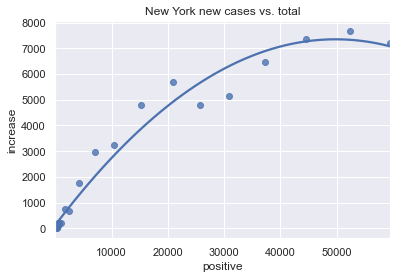

In [6]:
sns.set()
state_data = get_data_for_state('NY')
plot = sns.regplot(x="positive",y="increase",data=state_data, order=2, ci=None)
plot.set_title('New York new cases vs. total')
# plot.get_figure().savefig('blah.png')


If the curve trends downward over the course of a few days, that might indicate that the situation is improving because the number of new cases is dropping.